# Capstone Project - The Battle of the Neighborhoods (Week 2)
###  Applied Data Science Capstone Project by IBM (Coursera)

## Table of contents
* [Introduction to the business problem](#intro)
* [Data and steps to tackle the business problem](#data)
* [Code regarding geo, population and rents data ](#code)
* [Code regarding venues data ](#code1)
* [Example: Open pharmacy as a specific business](#code2)

## 1) Introduction to the business problem <a name="intro"></a>

Moscow is considered to be one of the biggest economic, political, and cultural centers worldwide. The official population of the state is 12 678 079 people combining vast variety of ethnicities and with the population density 4949,47 people/km²(https://www.gks.ru/storage/mediabank/Popul2020.xls). Moscow is also the major economic center of the Russian Federation. With the high density of population and non-declining number of incoming labour from overall Russia as well as other countries appeals new businesses in both traditional and innovative sectors. We consider municipal districts of Moscow (125) throughout the project.

We majorly address problem to the local small or middle-size businesses that are concentrated on 'venue'-type businesses and where questions as following can arise:
* Based on average income of the area, which city do we choose?
* What is the situation in borrows and whom can we target?
* What venues types are in the area and which ones are most popular? 
* Which areas are not oversaturated with similar type of businesses?
  ... and so many more. Therefore, this project is aimed to help answer questions that certainly arise when there exists a consideration of establishing a new venue to enrich strategical aims based on data analysis and analytics.

## 2) Data to tackle the business problem <a name="data"></a>

In this project we use:
* Forsquare API to get venues of a chosen citiy
* As up-to-date granular data for income distribution in Moscow was not found by me, I decided to use average house renting prices per m² from Domofond.ru within municipal districts (boroughs)
* I also use Wikipedia page on Moscow population data by Districts ("https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%80%D0%B0%D0%B9%D0%BE%D0%BD%D0%BE%D0%B2_%D0%B8_%D0%BF%D0%BE%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B9_%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D1%8B")
* And at the end, when I choose an example of the venue to analyse the setlement I use sorted CIAN data (https://www.cian.ru)

Idea is to get overall data on renting and analyse it as an alternative to the income data. Then we want to see most lucrative city and pick it. For the sake of better undertanding we want check how many districts are there in each borough. We further proceed with the highest average renting price per borough. As soon as this is done we have a look at population density to get a better undertanding of how many customers we can surve. Then we get vanue data and first look at the overall picture, what is present among venues and popular. At the end, we choose one particular venue and add pricing of the rent for the business purposes and analyse which location would be the optimal.

## 3) Code regarding geo, population and rents data <a name="code"></a>

In [1]:
#This notebook will be mainly used for the  project.
import pandas as pd
import numpy as np
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
import json # library to handle JSON files
!conda install -c conda-forge geopy --yes 
import geopy.geocoders
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans
#import time

import codecs
!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library
import csv
import os
print('Required libraries are imported')
os.getcwd()

Solving environment: | 
  - anaconda/osx-64::ca-certificates-2020.1.1-0, anaconda/osx-64::certifi-2019.11.28-py37_0, anaconda/osx-64::openssl-1.1.1d-h1de35cc_4
  - anaconda/osx-64::ca-certificates-2020.1.1-0, anaconda/osx-64::certifi-2019.11.28-py37_0, defaults/osx-64::openssl-1.1.1d-h1de35cc_4
  - anaconda/osx-64::certifi-2019.11.28-py37_0, anaconda/osx-64::openssl-1.1.1d-h1de35cc_4, defaults/osx-64::ca-certificates-2020.1.1-0
  - anaconda/osx-64::certifi-2019.11.28-py37_0, defaults/osx-64::ca-certificates-2020.1.1-0, defaults/osx-64::openssl-1.1.1d-h1de35cc_4
  - anaconda/osx-64::openssl-1.1.1d-h1de35cc_4, defaults/osx-64::ca-certificates-2020.1.1-0, defaults/osx-64::certifi-2019.11.28-py37_0
  - defaults/osx-64::ca-certificates-2020.1.1-0, defaults/osx-64::certifi-2019.11.28-py37_0, defaults/osx-64::openssl-1.1.1d-h1de35cc_4
  - anaconda/osx-64::ca-certificates-2020.1.1-0, anaconda/osx-64::openssl-1.1.1d-h1de35cc_4, defaults/osx-64::certifi-2019.11.28-py37_0
  - anaconda/osx-64::ca-

'/Users/maria'

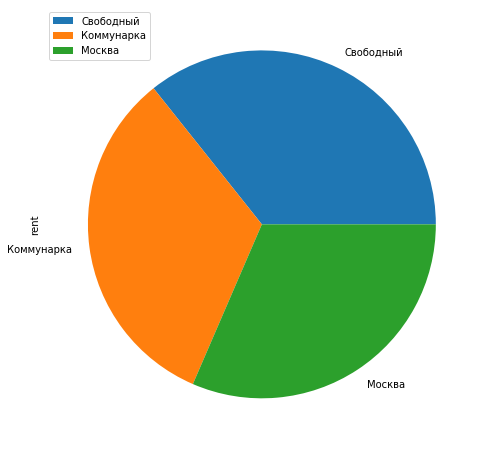

In [2]:
df = pd.read_excel(r'/Users/maria/Downloads/untitled folder/price-stats1.xlsx',sheet_name = 'Города Аренда',usecols=['Город', 'май.20'], header=0,index_col=False)
df.nlargest(5, ['май.20']) 
df = pd.DataFrame({'rent': [1000, 919 , 882],  'radius': [10, 10, 10]},
              index=['Свободный', 'Коммунарка', 'Москва'])
plot = df.plot.pie(y='rent', figsize=(8, 8))

#we choose Moscow as we are more familiar with Moscow suburbs and probably the numbers for Kommunarka and Svobodniy are higher due to some extreme cases when was averaged within the data set obtained. So from now on we proceed with Moscow

In [3]:
os.chdir('/Users/maria/Downloads')
#define a function to get the geocodes i.e latitude and longitude of a given location using geopy

# Moscow latitude, longitude
geolocator = Nominatim()
location = geolocator.geocode('Москва')
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Moscow are {}, {}.'.format(latitude, longitude))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Using Nominatim with the default "geopy/1.22.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """


The geograpical coordinates of Moscow are 55.7504461, 37.6174943.


In [4]:
# we want labels to be in russian language on the map
russ = ['Ь', 'ь', 'Ъ', 'ъ', 'А', 'а', 'Б', 'б', 'В', 'в', 'Г', 'г', 'Д', 'д', 'Е', 'е', 'Ё', 'ё',
            'Ж', 'ж', 'З', 'з', 'И', 'и', 'Й', 'й', 'К', 'к', 'Л', 'л', 'М', 'м', 'Н', 'н', 'О', 'о',
            'П', 'п', 'Р', 'р', 'С', 'с', 'Т', 'т', 'У', 'у', 'Ф', 'ф', 'Х', 'х', 'Ц', 'ц', 'Ч', 'ч',
            'Ш', 'ш', 'Щ', 'щ', 'Ы', 'ы', 'Э', 'э', 'Ю', 'ю', 'Я', 'я']


repl = {'Ь':'', 'ь':'', 'Ъ':'', 'ъ':'', 'А':'A', 'а':'a', 'Б':'B', 'б':'b', 'В':'V', 'в':'v',
       'Г':'G', 'г':'g', 'Д':'D', 'д':'d', 'Е':'E', 'е':'e', 'Ё':'E', 'ё':'e', 'Ж':'Zh', 'ж':'zh',
       'З':'Z', 'з':'z', 'И':'I', 'и':'i', 'Й':'I', 'й':'i', 'К':'K', 'к':'k', 'Л':'L', 'л':'l',
       'М':'M', 'м':'m', 'Н':'N', 'н':'n', 'О':'O', 'о':'o', 'П':'P', 'п':'p', 'Р':'R', 'р':'r', 
       'С':'S', 'с':'s', 'Т':'T', 'т':'t', 'У':'U', 'у':'u', 'Ф':'F', 'ф':'f', 'Х':'Kh', 'х':'kh',
       'Ц':'Tc', 'ц':'tc', 'Ч':'Ch', 'ч':'ch', 'Ш':'Sh', 'ш':'sh', 'Щ':'Shch', 'щ':'shch', 'Ы':'Y',
       'ы':'y', 'Э':'E', 'э':'e', 'Ю':'Iu', 'ю':'iu', 'Я':'Ia', 'я':'ia'}
 

def translit(x): 
    string = str()
    length = len(x)
    for i in range(0,length):
        if x[i] in russ:
            symb = repl[x[i]]
        else:
            symb = x[i]
        string = string + symb

    return string



In [5]:
def get_msc_data():
    url='http://gis-lab.info/data/mos-adm/mo.geojson'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'District Name', 'Type'] 
    # instantiate the dataframe
    msc_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['NAME'] 
        neighborhood_name = data['properties']['NAME_AO']
        typee = data['properties']['TYPE_MO']
        
        neighborhood_latlon = data['geometry']['coordinates']
        msc_data = msc_data.append({'District Name': borough,
                                          'Borough': neighborhood_name,
                                          'Type':typee,  
                                          'Coordinates': neighborhood_latlon}, ignore_index=True) 
        msc_data = msc_data[msc_data.Type != 'Поселение']
        msc_data = msc_data[msc_data.Type != 'Городской округ']
    return msc_data

msc_data=get_msc_data()
msc_data.to_csv('mynew.csv')
msc = pd.read_csv('mynew.csv')
msc_data.drop(columns =['Type','Coordinates'], axis=1)

,Borough,District Name
0,Западный,Филёвский Парк
1,Зеленоградский,Матушкино
2,Западный,Внуково
3,Зеленоградский,Савёлки
4,Зеленоградский,Силино
...,...,...
120,Восточный,Ивановское
121,Восточный,Косино-Ухтомский
122,Восточный,Новокосино
123,Юго-Восточный,Некрасовка


In [6]:
# read the file with data on rent
df = pd.read_excel(r'/Users/maria/Downloads/untitled folder/price-stats.xlsx',sheet_name = 'Районы Аренда', header=0,index_col=False)
df.dropna(axis='rows').reset_index(drop=True)
# read the file on coordinates
data=pd.read_csv('Book4.csv')
data.columns = ['a','Long','Lat']
# merge two tables
mos = pd.merge(df, data)
mos
# now we want to drop "a" & the city name
data = mos.drop(columns =['a', 'cityname'], axis=1)

In [7]:
# note that there is 12 Boroughs in Moscow, but our data excludes Troitskiy and Novomoskovskiy & we also previously confused lat and long so change it here
moscow = pd.merge(msc_data, data,  on='District Name').drop(columns =['Type', 'Coordinates'], axis=1)
moscow.columns = ['Borough','District Name','Rent', 'Latitude', 'Longitude']
moscow["Rent"] = moscow["Rent"].astype(int)

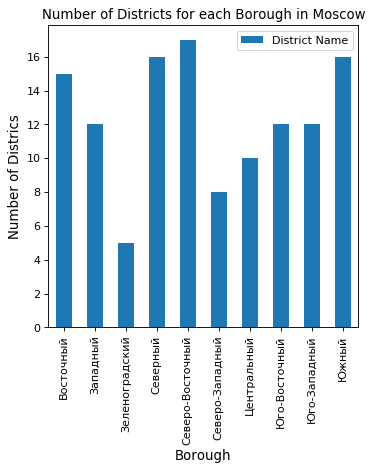

In [8]:
#let us plot on the graph Boroughs and the # of districts on the graph to compare the most "saturated" with districts
plt.figure(figsize=(5,5), dpi = 80)
# title
plt.title('Number of Districts for each Borough in Moscow')
#On x-axis
plt.xlabel('Borough', fontsize = 12)
#On y-axis
plt.ylabel('Number of Districs', fontsize=12)
#giving a bar plot
moscow.groupby('Borough')['District Name'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

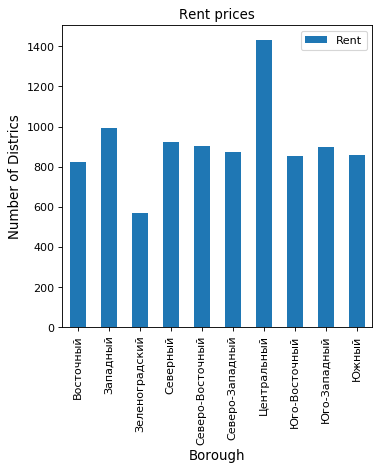

In [9]:
#we do the same but instead of taking overall sum, we take the average of rent prices in boroughs  - we see that the most expensive one is Centralniy
plt.figure(figsize=(5,5), dpi = 80)
# title
plt.title('Rent prices')
#On x-axis
plt.xlabel('Borough', fontsize = 12)
#On y-axis
plt.ylabel('Number of Districs', fontsize=12)
#giving a bar plot
moscow.groupby('Borough')['Rent'].mean().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [10]:
# what about population density?
url2 = "https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%80%D0%B0%D0%B9%D0%BE%D0%BD%D0%BE%D0%B2_%D0%B8_%D0%BF%D0%BE%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B9_%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D1%8B"
#import data from html and pass url as an argument. As read produces a list of a data frames we further need to access desired one via index [0] 
popul = pd.read_html(url2)[0]
p=popul.drop(columns =['№', 'Флаг','Герб','Адми-нистра-тивныйокруг','Название cоответствующего внутригородского муниципального образования: муниципального округа / поселения / городского округа[5]','Пло-щадьжилого фонда(01.01.2010)[9],тыс. м²','Жил-площадьначело-века(01.01.2010),м²/чел.'], 
             axis=1)
population = p[:-21] # drop 21 bottom rows
# Get rid of '\n' and ' ↗'
population.replace('\n', '', regex=True, inplace=True)
population.replace('↗', '', regex=True, inplace=True)
population.replace('↘', '', regex=True, inplace=True)

population.columns = ['District Name', 'Area', 'Population','Population density']

population["Population"].replace('\xa0', '', regex=True, inplace=True)
population["Population"].replace(' ', '', regex=True, inplace=True)

population["Area"] = population["Area"].astype(int)
population["Population density"] = population["Population density"].astype(float)
population["Population"] = population["Population"].astype(float)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [11]:
overall_moscow_data = pd.merge(moscow, population, on ='District Name')
overall_moscow_data.sort_values(by = 'Population',ascending = False)
overall_moscow_data.to_csv('Moscow_Borough_df.csv')
overall_moscow_data

,Borough,District Name,Rent,Latitude,Longitude,Area,Population,Population density
0,Западный,Филёвский Парк,1200,55.751200,37.508200,962,94323.0,9804.89
1,Зеленоградский,Матушкино,585,56.005103,37.200116,438,40694.0,9290.87
2,Зеленоградский,Савёлки,550,55.989600,37.232100,813,34472.0,4240.10
3,Зеленоградский,Силино,526,55.998700,37.169300,1040,40218.0,3867.12
4,Зеленоградский,Крюково,579,55.969330,37.176122,1049,100098.0,9542.23
...,...,...,...,...,...,...,...,...
118,Восточный,Ивановское,758,55.771800,37.819900,1019,128267.0,12587.54
119,Восточный,Косино-Ухтомский,675,55.717061,37.863450,1505,82267.0,5466.25
120,Восточный,Новокосино,765,55.740167,37.861725,360,107907.0,29974.17
121,Юго-Восточный,Некрасовка,684,55.683793,37.928704,558,71943.0,12893.01


In [12]:
overall_moscow_data.nlargest(15, ['Population density']) 
# almost all very far from center - depending on what we aim to open we can analyze it

,Borough,District Name,Rent,Latitude,Longitude,Area,Population,Population density
108,Южный,Зябликово,789,55.621900,37.742900,438,133278.0,30428.77
120,Восточный,Новокосино,765,55.740167,37.861725,360,107907.0,29974.17
11,Юго-Западный,Ломоносовский,976,55.678778,37.533239,334,88320.0,26443.11
52,Северный,Восточное Дегунино,780,55.880100,37.557600,377,98923.0,26239.52
69,Северо-Восточный,Бибирево,789,55.893800,37.611100,645,160163.0,24831.47
46,Северный,Бескудниковский,826,55.865900,37.553300,330,79603.0,24122.12
55,Юго-Западный,Зюзино,889,55.653100,37.598400,545,126815.0,23268.81
78,Северо-Восточный,Северное Медведково,833,55.888000,37.645500,566,127819.0,22582.86
111,Восточный,Новогиреево,799,55.748154,37.804108,445,98415.0,22115.73
76,Северо-Восточный,Южное Медведково,778,55.871000,37.638300,388,85698.0,22087.11


In [13]:
overall_moscow_data.nlargest(15, ['Rent']) 

,Borough,District Name,Rent,Latitude,Longitude,Area,Population,Population density
51,Центральный,Хамовники,1727,55.731100,37.578400,1008,109218.0,10835.12
60,Центральный,Арбат,1565,55.751199,37.589872,211,36125.0,17120.85
65,Центральный,Якиманка,1562,55.730100,37.612100,480,27672.0,5765.00
44,Центральный,Пресненский,1538,55.763432,37.562389,1170,128062.0,10945.47
63,Центральный,Тверской,1500,55.772400,37.604500,727,77864.0,10710.32
77,Центральный,Замоскворечье,1500,55.731000,37.636200,432,59105.0,13681.71
75,Центральный,Мещанский,1346,55.780066,37.628801,460,61213.0,13307.17
40,Северный,Хорошёвский,1333,55.778200,37.523300,988,72676.0,7355.87
82,Центральный,Басманный,1299,55.767281,37.669773,837,110694.0,13225.09
31,Западный,Раменки,1289,55.706100,37.513900,1854,141610.0,7638.08


In [14]:
overall_moscow_data.nlargest(15, ['Population']) 

,Borough,District Name,Rent,Latitude,Longitude,Area,Population,Population density
101,Юго-Восточный,Марьино,782,55.652664,37.744774,1191,253943.0,21321.83
116,Юго-Восточный,Выхино-Жулебино,750,55.702800,37.822600,1497,225154.0,15040.35
36,Юго-Западный,Южное Бутово,692,55.543300,37.548300,2554,210676.0,8248.86
16,Северо-Западный,Митино,789,55.845370,37.365828,1267,194965.0,15387.92
59,Северо-Восточный,Отрадное,853,55.862060,37.600262,1018,185488.0,18220.83
37,Юго-Западный,Ясенево,804,55.606100,37.532300,2537,177901.0,7012.26
25,Северо-Западный,Хорошёво-Мнёвники,982,55.775100,37.477100,1718,173615.0,10105.65
105,Юго-Восточный,Люблино,849,55.677717,37.748726,1741,172054.0,9882.48
22,Северо-Западный,Северное Тушино,827,55.858000,37.432200,940,165762.0,17634.26
113,Восточный,Гольяново,771,55.816800,37.798200,1499,163009.0,10874.52


In [14]:
geolocator = Nominatim(user_agent="mos_exp")
location = geolocator.geocode('Moscow, Russia')
lt = location.latitude
lg = location.longitude
map_mos = folium.Map(location=[lt, lg], zoom_start=12)

url='http://gis-lab.info/data/mos-adm/mo.geojson'
resp=requests.get(url).json()

with open('Moscow_Borough_df.csv', encoding='utf-8') as fh:
    data = fh.read()
moscow_df = pd.read_csv("Moscow_Borough_df.csv")  
moscow_df=moscow_df[moscow_df['Rent']>0]

map_mos.choropleth(
    geo_data=url,
    data=moscow_df,
    columns=['District Name', 'Rent'],
    key_on='feature.properties.NAME',
    fill_color='YlGn', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average Rent')
    

for lat, lng, distr, rent in zip(moscow_df['Latitude'], moscow_df['Longitude'], moscow_df['District Name'], moscow_df['Rent']):
    label = folium.Popup( 'Rent: '+ (str(rent))+  ', ' +  'District Name: ' + translit(distr), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='yellow',
        fill=False,
        #fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mos)
map_mos

## Code regarding venues data <a name="code1"></a>

BUT FIRST CHECK FREQUENCY AND RANKINGS OF PLACED. CAN ALSO CHOOSE ONE AND LOOK HOW AR FROM METRO, CHECK NEIGHBOURS - IF RESTAURANTS AND MAYBE CORRELATION BETWEEN HOUSING PRICES AND TIPS, RANKING AND TIPS, TIPS AND AREA DENISTY & CREATE CLUSTERS + translate into english

In [15]:
#my credentials
CLIENT_ID ='MJTE5XMM1CH5QYQUIFL1XP5YNRWSFKARG12A5EY5BGMBYATE'
CLIENT_SECRET = 'WGKCSLPRFWG02V1OBY5IAFXAFVY0Q4DJYNW5ANC3QY5V0UC0'
VERSION = '20180605' # Foursquare API version
radius = 100
LIMIT=100
url4 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lt, 
            lg, 
            radius, 
            LIMIT)
    
    # get all the data
results = requests.get(url4).json()
results

{'meta': {'code': 200, 'requestId': '5ee635ef74cf2678a2f40ef5'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Khamovniki',
  'headerFullLocation': 'Khamovniki, Moscow',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 3,
  'suggestedBounds': {'ne': {'lat': 55.7513461009, 'lng': 37.619090467204124},
   'sw': {'lat': 55.749546099099994, 'lng': 37.61589813279587}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4da9654f43a1128196dbea8b',
       'name': 'Cathedral Square (Соборная площадь)',
       'location': {'address': 'Соборная пл.',
        'lat': 55.75067703638466,
        'lng': 37.61744217329331,
        'labeledLatLngs': [

In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District Name', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
moscow_venues = getNearbyVenues(names=overall_moscow_data['District Name'],
                                   latitudes=overall_moscow_data['Latitude'],
                                   longitudes=overall_moscow_data['Longitude']
                                  )

Филёвский Парк
Матушкино
Савёлки
Силино
Крюково
Щукино
Нагатинский Затон
Старое Крюково
Дмитровский
Тёплый Стан
Ховрино
Ломоносовский
Можайский
Ново-Переделкино
Строгино
Молжаниновский
Митино
Куркино
Крылатское
Солнцево
Головинский
Южное Тушино
Северное Тушино
Черёмушки
Покровское-Стрешнево
Хорошёво-Мнёвники
Очаково-Матвеевское
Тропарёво-Никулино
Левобережный
Фили-Давыдково
Обручевский
Раменки
Войковский
Сокол
Западное Дегунино
Проспект Вернадского
Южное Бутово
Ясенево
Дорогомилово
Коньково
Хорошёвский
Беговой
Коптево
Аэропорт
Пресненский
Северный
Бескудниковский
Гагаринский
Тимирязевский
Северное Бутово
Лианозово
Хамовники
Восточное Дегунино
Савёловский
Академический
Зюзино
Алтуфьевский
Марфино
Чертаново Центральное
Отрадное
Арбат
Чертаново Южное
Бутырский
Тверской
Чертаново Северное
Якиманка
Котловка
Останкинский
Донской
Бибирево
Бирюлёво Западное
Марьина Роща
Нагорный
Свиблово
Даниловский
Мещанский
Южное Медведково
Замоскворечье
Северное Медведково
Нагатино-Садовники
Москворечье-Саб

In [18]:
print(moscow_venues.shape)
moscow_venues.to_csv('mynewvenues.csv')
moscow_venues

(2483, 7)


,District Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Филёвский Парк,55.75120,37.508200,RollerShop (Роллермаг),55.748076,37.513905,Board Shop
1,Филёвский Парк,55.75120,37.508200,HL | Holy Land,55.749521,37.502167,Cosmetics Shop
2,Филёвский Парк,55.75120,37.508200,Ели сацебели,55.755320,37.507718,Café
3,Филёвский Парк,55.75120,37.508200,Листок,55.753128,37.502470,Café
4,Филёвский Парк,55.75120,37.508200,НикОль,55.749222,37.501394,Cosmetics Shop
...,...,...,...,...,...,...,...
2478,Кунцево,55.74261,37.398482,Остановка «ЦКБ»,55.745189,37.395215,Bus Stop
2479,Кунцево,55.74261,37.398482,Парк,55.746161,37.399371,Park
2480,Кунцево,55.74261,37.398482,Синегория,55.740114,37.403173,Dance Studio
2481,Кунцево,55.74261,37.398482,Остановка «Стадион»,55.738309,37.397978,Bus Stop


In [19]:
# as requests are limited we use the saved csv file of venues and work with it
# 2) total # of venues in each neighbourhood
df_towork = pd.read_csv('mynewvenues.csv')
df_towork.drop(columns =['Unnamed: 0'], axis=1, inplace = True)
df_work = pd.merge(df_towork,overall_moscow_data)
df_work

,District Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Borough,Rent,Area,Population,Population density
0,Филёвский Парк,55.75120,37.508200,RollerShop (Роллермаг),55.748076,37.513905,Board Shop,Западный,1200,962,94323.0,9804.89
1,Филёвский Парк,55.75120,37.508200,HL | Holy Land,55.749521,37.502167,Cosmetics Shop,Западный,1200,962,94323.0,9804.89
2,Филёвский Парк,55.75120,37.508200,Ели сацебели,55.755320,37.507718,Café,Западный,1200,962,94323.0,9804.89
3,Филёвский Парк,55.75120,37.508200,Листок,55.753128,37.502470,Café,Западный,1200,962,94323.0,9804.89
4,Филёвский Парк,55.75120,37.508200,НикОль,55.749222,37.501394,Cosmetics Shop,Западный,1200,962,94323.0,9804.89
...,...,...,...,...,...,...,...,...,...,...,...,...
1993,Кунцево,55.74261,37.398482,Остановка «ЦКБ»,55.745189,37.395215,Bus Stop,Западный,938,1656,152364.0,9200.72
1994,Кунцево,55.74261,37.398482,Парк,55.746161,37.399371,Park,Западный,938,1656,152364.0,9200.72
1995,Кунцево,55.74261,37.398482,Синегория,55.740114,37.403173,Dance Studio,Западный,938,1656,152364.0,9200.72
1996,Кунцево,55.74261,37.398482,Остановка «Стадион»,55.738309,37.397978,Bus Stop,Западный,938,1656,152364.0,9200.72


In [20]:
print('There are {} uniques categories.'.format(len(moscow_venues['Venue Category'].unique())))
# we can see venues grouped by districts
df_work.groupby('District Name').count()

There are 289 uniques categories.


,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Borough,Rent,Area,Population,Population density
District Name,,,,,,,,,,,
Академический,50,50,50,50,50,50,50,50,50,50,50
Алексеевский,22,22,22,22,22,22,22,22,22,22,22
Алтуфьевский,12,12,12,12,12,12,12,12,12,12,12
Арбат,99,99,99,99,99,99,99,99,99,99,99
Аэропорт,12,12,12,12,12,12,12,12,12,12,12
...,...,...,...,...,...,...,...,...,...,...,...
Южное Тушино,27,27,27,27,27,27,27,27,27,27,27
Южнопортовый,36,36,36,36,36,36,36,36,36,36,36
Якиманка,60,60,60,60,60,60,60,60,60,60,60


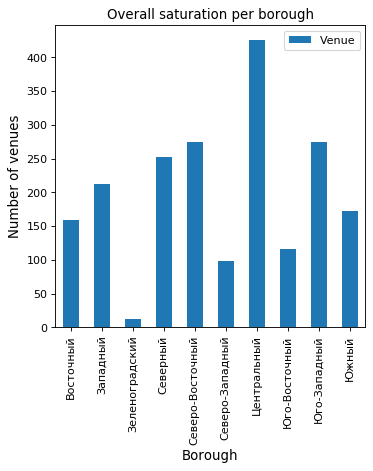

In [22]:
#let us plot on the graph Boroughs and the # of districts on the graph to compare the most "saturated" with districts
plt.figure(figsize=(5,5), dpi = 80)
# title
plt.title('Overall saturation per borough')
#On x-axis
plt.xlabel('Borough', fontsize = 12)
#On y-axis
plt.ylabel('Number of venues', fontsize=12)
#giving a bar plot
df_work.groupby('Borough')['Venue'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot 
plt.show()

In [21]:
# from lab: one hot encoding
mos_onehot = pd.get_dummies(df_work[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
mos_onehot['District Name'] = df_work['District Name'] 

# move neighborhood column to the first column
fix_j = [mos_onehot.columns[-1]] + list(mos_onehot.columns[:-1])
mos_onehot =  mos_onehot[fix_j]


In [23]:
mos_grouped = mos_onehot.groupby('District Name').mean().reset_index()
mos_grouped

,District Name,ATM,Adult Boutique,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Art Studio,Arts & Crafts Store,...,Video Store,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Waterfall,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Академический,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,Алексеевский,0.0,0.0,0.000000,0.045455,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.045455
2,Алтуфьевский,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
3,Арбат,0.0,0.0,0.010101,0.010101,0.0,0.020202,0.010101,0.0,0.010101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.010101,0.010101,0.000000,0.030303
4,Аэропорт,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Южное Тушино,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.037037,0.000000,0.000000,0.000000
89,Южнопортовый,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.027778,0.000000
90,Якиманка,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.016667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
91,Ярославский,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000


In [24]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [25]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District Name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['District Name'] = mos_grouped['District Name']

for ind in np.arange(mos_grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(mos_grouped.iloc[ind, :], num_top_venues)

venues_sorted

,District Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Академический,Coffee Shop,Pharmacy,Health Food Store,Sporting Goods Shop,Beer Store,Dance Studio,Park,Optical Shop,Bookstore,Sushi Restaurant
1,Алексеевский,Recording Studio,Supermarket,Pizza Place,Auto Workshop,Historic Site,Gym / Fitness Center,Mobile Phone Shop,Food & Drink Shop,Office,Farmers Market
2,Алтуфьевский,Supermarket,Lake,Gym / Fitness Center,Hotel,Pub,Dry Cleaner,Café,Grocery Store,Cafeteria,Salon / Barbershop
3,Арбат,Coffee Shop,Hotel,Yoga Studio,Hostel,Bakery,Museum,Caucasian Restaurant,Gym / Fitness Center,Italian Restaurant,Flower Shop
4,Аэропорт,Coffee Shop,Salon / Barbershop,Martial Arts Dojo,Smoke Shop,Gourmet Shop,Clothing Store,Pet Store,Pharmacy,Asian Restaurant,Caucasian Restaurant
...,...,...,...,...,...,...,...,...,...,...,...
88,Южное Тушино,Pizza Place,Flower Shop,Sushi Restaurant,Convenience Store,Park,Pub,Coffee Shop,Food & Drink Shop,Movie Theater,Electronics Store
89,Южнопортовый,Film Studio,Electronics Store,Dance Studio,Boutique,Bakery,Baby Store,Fried Chicken Joint,Café,Fast Food Restaurant,Farmers Market
90,Якиманка,Coffee Shop,Bakery,Gym / Fitness Center,Shoe Store,Bridal Shop,Donut Shop,Pub,Mobile Phone Shop,Karaoke Bar,Cosmetics Shop
91,Ярославский,Park,Fountain,Pizza Place,Shopping Mall,Café,Auto Workshop,Coffee Shop,Photography Studio,Concert Hall,Bus Stop


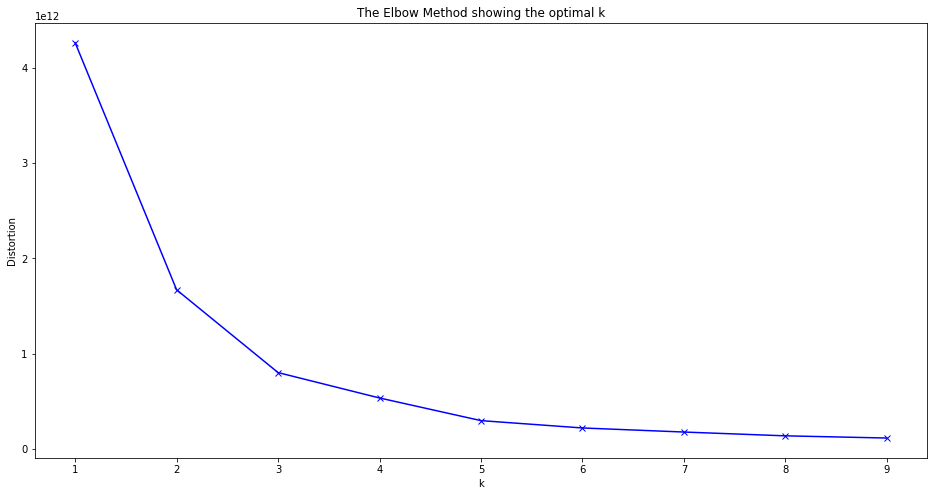

In [26]:
gg = df_work.drop(['District Name','Venue', 'Borough', 'Venue Category'], 1)
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(gg)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [27]:
grouped_clustering = mos_grouped.drop('District Name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[:]


array([1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1], dtype=int32)

In [28]:
venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
venues_sorted

,Cluster Labels,District Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Академический,Coffee Shop,Pharmacy,Health Food Store,Sporting Goods Shop,Beer Store,Dance Studio,Park,Optical Shop,Bookstore,Sushi Restaurant
1,1,Алексеевский,Recording Studio,Supermarket,Pizza Place,Auto Workshop,Historic Site,Gym / Fitness Center,Mobile Phone Shop,Food & Drink Shop,Office,Farmers Market
2,0,Алтуфьевский,Supermarket,Lake,Gym / Fitness Center,Hotel,Pub,Dry Cleaner,Café,Grocery Store,Cafeteria,Salon / Barbershop
3,1,Арбат,Coffee Shop,Hotel,Yoga Studio,Hostel,Bakery,Museum,Caucasian Restaurant,Gym / Fitness Center,Italian Restaurant,Flower Shop
4,1,Аэропорт,Coffee Shop,Salon / Barbershop,Martial Arts Dojo,Smoke Shop,Gourmet Shop,Clothing Store,Pet Store,Pharmacy,Asian Restaurant,Caucasian Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...
88,1,Южное Тушино,Pizza Place,Flower Shop,Sushi Restaurant,Convenience Store,Park,Pub,Coffee Shop,Food & Drink Shop,Movie Theater,Electronics Store
89,1,Южнопортовый,Film Studio,Electronics Store,Dance Studio,Boutique,Bakery,Baby Store,Fried Chicken Joint,Café,Fast Food Restaurant,Farmers Market
90,1,Якиманка,Coffee Shop,Bakery,Gym / Fitness Center,Shoe Store,Bridal Shop,Donut Shop,Pub,Mobile Phone Shop,Karaoke Bar,Cosmetics Shop
91,1,Ярославский,Park,Fountain,Pizza Place,Shopping Mall,Café,Auto Workshop,Coffee Shop,Photography Studio,Concert Hall,Bus Stop


In [29]:
mo = overall_moscow_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
mo = mo.join(venues_sorted.set_index('District Name'), on='District Name')

mo.head()

,Borough,District Name,Rent,Latitude,Longitude,Area,Population,Population density,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Западный,Филёвский Парк,1200,55.751200,37.508200,962,94323.0,9804.89,1.0,Cosmetics Shop,Café,Insurance Office,Bus Stop,Asian Restaurant,Trail,Car Wash,Playground,Supermarket,Board Shop
1,Зеленоградский,Матушкино,585,56.005103,37.200116,438,40694.0,9290.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Зеленоградский,Савёлки,550,55.989600,37.232100,813,34472.0,4240.10,0.0,Rest Area,Pool Hall,Bus Stop,Pool,Hockey Arena,Supermarket,Park,Food Court,Fountain,Food & Drink Shop
3,Зеленоградский,Силино,526,55.998700,37.169300,1040,40218.0,3867.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Зеленоградский,Крюково,579,55.969330,37.176122,1049,100098.0,9542.23,1.0,Paintball Field,Scenic Lookout,Hockey Arena,Eastern European Restaurant,Exhibit,Fabric Shop,Farmers Market,Fast Food Restaurant,Film Studio,Yoga Studio


In [30]:
# create map
map_clusters = folium.Map(location=[lt, lg], zoom_start=11)

# set color scheme for the clusters
x = np.arange(5)
ys = [i + x + (i*x)**2 for i in range(5)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, name, cluster, rent in zip(mo['Latitude'], mo['Longitude'], mo['District Name'], mo['Cluster Labels'], mo ['Rent']):
    label = folium.Popup('District Name: ' + translit(name) + ', '+ ' Cluster ' + str(cluster) + ', ' 'Rent: '+ (str(rent)), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        #color=rainbow[cluster-1],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
        
        
map_clusters

In [31]:
mo.loc[mo['Cluster Labels'] == 0, mo.columns[[1] + list(range(5, mo.shape[1]))]]

,District Name,Area,Population,Population density,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Савёлки,813,34472.0,4240.10,0.0,Rest Area,Pool Hall,Bus Stop,Pool,Hockey Arena,Supermarket,Park,Food Court,Fountain,Food & Drink Shop
7,Старое Крюково,381,31053.0,8150.39,0.0,Hookah Bar,Gastropub,Bus Stop,Food,Farmers Market,Fast Food Restaurant,Film Studio,Fish Market,Flower Shop,Yoga Studio
8,Дмитровский,729,93468.0,12821.40,0.0,Supermarket,Electronics Store,Bus Stop,Pet Store,Convenience Store,Gym,Pizza Place,Bus Station,Farmers Market,Fast Food Restaurant
10,Ховрино,573,89018.0,15535.43,0.0,Supermarket,Ice Cream Shop,Arts & Crafts Store,Café,Cafeteria,Auto Workshop,Bus Stop,Gym / Fitness Center,Pizza Place,Country Dance Club
19,Солнцево,1129,126456.0,11200.71,0.0,Bus Stop,Supermarket,Notary,Cosmetics Shop,Metro Station,Gym / Fitness Center,Market,Pharmacy,Convenience Store,Lake
20,Головинский,893,103197.0,11556.22,0.0,Auto Workshop,Pizza Place,Bus Stop,Supermarket,Bakery,Pet Store,Paper / Office Supplies Store,Convenience Store,Food & Drink Shop,Waterfall
36,Южное Бутово,2554,210676.0,8248.86,0.0,Supermarket,Gym / Fitness Center,Health Food Store,Bus Stop,Sushi Restaurant,Café,Toy / Game Store,Massage Studio,Baby Store,Office
52,Восточное Дегунино,377,98923.0,26239.52,0.0,Supermarket,Park,Health Food Store,Pedestrian Plaza,Baby Store,Shopping Mall,Pet Store,Toy / Game Store,Miscellaneous Shop,Exhibit
56,Алтуфьевский,325,57596.0,17721.85,0.0,Supermarket,Lake,Gym / Fitness Center,Hotel,Pub,Dry Cleaner,Café,Grocery Store,Cafeteria,Salon / Barbershop
57,Марфино,297,35387.0,11914.81,0.0,Supermarket,Bakery,Pool,Bus Line,Convenience Store,Arts & Entertainment,Dessert Shop,Fountain,Frame Store,Food Court


In [32]:
mo.loc[mo['Cluster Labels'] == 1, mo.columns[[1] + list(range(5, mo.shape[1]))]]

,District Name,Area,Population,Population density,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Филёвский Парк,962,94323.0,9804.89,1.0,Cosmetics Shop,Café,Insurance Office,Bus Stop,Asian Restaurant,Trail,Car Wash,Playground,Supermarket,Board Shop
4,Крюково,1049,100098.0,9542.23,1.0,Paintball Field,Scenic Lookout,Hockey Arena,Eastern European Restaurant,Exhibit,Fabric Shop,Farmers Market,Fast Food Restaurant,Film Studio,Yoga Studio
5,Щукино,769,111203.0,14460.73,1.0,Bus Stop,Gym / Fitness Center,Pizza Place,Stadium,Fountain,Furniture / Home Store,Park,Martial Arts Dojo,Lingerie Store,Boxing Gym
6,Нагатинский Затон,980,120954.0,12342.24,1.0,Gym / Fitness Center,Candy Store,Wine Shop,Food,Burger Joint,Playground,Farmers Market,Cosmetics Shop,Convenience Store,Park
9,Тёплый Стан,750,134321.0,17909.47,1.0,Supermarket,Basketball Court,Health Food Store,Shopping Mall,Sushi Restaurant,Candy Store,Miscellaneous Shop,Beer Store,Martial Arts Dojo,Clothing Store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,Выхино-Жулебино,1497,225154.0,15040.35,1.0,Restaurant,Convenience Store,Grocery Store,Bar,Nightclub,Frame Store,Fountain,Food Court,French Restaurant,Food & Drink Shop
117,Восточное Измайлово,385,78154.0,20299.74,1.0,Shawarma Place,Exhibit,Furniture / Home Store,Supermarket,Garden,Theater,Beer Store,Middle Eastern Restaurant,Paper / Office Supplies Store,French Restaurant
119,Косино-Ухтомский,1505,82267.0,5466.25,1.0,Soccer Field,Harbor / Marina,Print Shop,Fish Market,Exhibit,Fabric Shop,Farmers Market,Fast Food Restaurant,Film Studio,Yoga Studio
120,Новокосино,360,107907.0,29974.17,1.0,Park,Health Food Store,Bookstore,Supermarket,Shopping Mall,Sushi Restaurant,German Restaurant,Candy Store,Middle Eastern Restaurant,Beer Bar


## Example: Open pharmacy as a specific business <a name="code2"></a>
### As we can see in previous clusterisation we included any type of venues... bad for analysis 

In [33]:
pharma = pd.read_csv('mynewvenues.csv').drop(columns =['Unnamed: 0'], axis=1)
pharma = pharma.loc[pharma['Venue Category'] == 'Pharmacy']
pharma.to_csv('pharma.csv')
pharma.shape

(59, 7)

In [34]:
apteka = pd.read_excel(r'/Users/maria/Downloads/offers-4.xlsx',usecols=['Район', 'Метро', 'Площадь', 'Цена'], header=0,index_col=False)
apteka['Площадь']=apteka['Площадь'].str.extract('(\d+)', expand=False).astype(float)
apteka['Цена']=apteka['Цена'].str.extract('(\d+)', expand=False).astype(float)
#mh_rent["area"] = mh_rent["area"].str.extract(r'([0-9]?[0-9]?[0-9]?[0-9]?.?[0-9])').values.astype(float)
apteka = apteka[apteka['Площадь']>60]
apteka = apteka[apteka['Площадь']<150]
apteka.columns = ['Area of Com. Rent', 'Metro','District Name','Price']
apteka

,Area of Com. Rent,Metro,District Name,Price
3,72.0,м. Белорусская (2 мин пешком),Тверской,480000.0
4,142.0,м. Улица 1905 года (5 мин пешком),Пресненский,800000.0
6,106.0,м. Лубянка (4 мин пешком),Тверской,1100001.0
7,78.0,м. Новокузнецкая (2 мин пешком),Якиманка,1250001.0
10,65.0,м. Чкаловская (2 мин пешком),Басманный,598000.0
17,85.0,м. Коломенская (3 мин пешком),Нагатинский Затон,450005.0
24,100.0,м. Университет (11 мин пешком),Проспект Вернадского,67500.0
26,81.0,м. Войковская (3 мин на машине),Сокол,149000.0
30,86.0,м. Белорусская (2 мин пешком),Тверской,599899.0
31,85.0,м. Китай-город (8 мин пешком),Басманный,697990.0


In [35]:
pharma = pd.read_csv('pharma.csv').drop(columns =['Unnamed: 0', 'Venue Category'], axis=1)
pharma

,District Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude
0,Нагатинский Затон,55.682849,37.681568,Гексал,55.683017,37.681513
1,Тёплый Стан,55.631100,37.482100,Центральная Аптека МО РАН,55.632502,37.478984
2,Ломоносовский,55.678778,37.533239,Асна,55.677981,37.532674
3,Ломоносовский,55.678778,37.533239,Фармастар,55.677265,37.535155
4,Строгино,55.802700,37.408000,Горздрав,55.804509,37.401795
5,Строгино,55.802700,37.408000,Аптека Оптовых Цен,55.799620,37.402606
6,Митино,55.845370,37.365828,Самсон Фарма,55.844091,37.363316
7,Митино,55.845370,37.365828,Трилистник на Митинской,55.844259,37.362324
8,Куркино,55.891209,37.387379,Валерьяночка,55.889578,37.394428
9,Солнцево,55.652500,37.387700,Аптеки Столицы № 68,55.654771,37.385234


In [36]:
# makes no sense to look at all possible pharmacies if we cannot rent out anything there, let us merge it
pharma1 = pd.merge (pharma, apteka)
pharma1

,District Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Area of Com. Rent,Metro,Price
0,Нагатинский Затон,55.682849,37.681568,Гексал,55.683017,37.681513,85.0,м. Коломенская (3 мин пешком),450005.0
1,Северное Тушино,55.858000,37.432200,Фармпростор,55.859719,37.432788,65.0,м. Первомайская (14 мин пешком),124995.0
2,Сокол,55.805900,37.503200,Dr. Nona,55.803670,37.509224,81.0,м. Войковская (3 мин на машине),149000.0
3,Дорогомилово,55.739800,37.520700,Самсон Фарма,55.737393,37.524963,100.0,м. Кутузовская (5 мин на машине),449000.0
4,Тверской,55.772400,37.604500,Самсон Фарма,55.773321,37.598090,72.0,м. Белорусская (2 мин пешком),480000.0
5,Тверской,55.772400,37.604500,Самсон Фарма,55.773321,37.598090,106.0,м. Лубянка (4 мин пешком),1100001.0
6,Тверской,55.772400,37.604500,Самсон Фарма,55.773321,37.598090,86.0,м. Белорусская (2 мин пешком),599899.0
7,Тверской,55.772400,37.604500,Самсон Фарма,55.773321,37.598090,114.0,м. Китай-город (7 мин пешком),848999.0
8,Тверской,55.772400,37.604500,Самсон Фарма,55.773321,37.598090,133.0,м. Менделеевская (2 мин пешком),288900.0
9,Тверской,55.772400,37.604500,Норма,55.776630,37.607171,72.0,м. Белорусская (2 мин пешком),480000.0


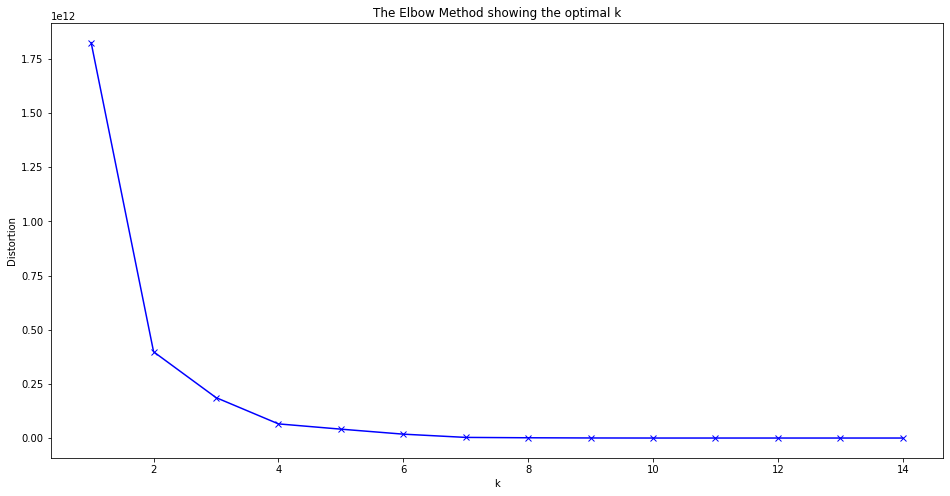

In [37]:
gg = pharma1.drop(['District Name','Venue', 'Metro'], 1)
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(gg)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [38]:
grouped_clustering = pharma1.drop(['District Name','Venue', 'Metro', 'Area of Com. Rent', 'Latitude', 'Longitude'], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[:]

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int32)

In [39]:
pharma1.insert(0, 'Cluster Labels', kmeans.labels_)
pharma1 = pd.merge(pharma1, overall_moscow_data)

In [40]:
pharma1

,Cluster Labels,District Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Area of Com. Rent,Metro,Price,Borough,Rent,Area,Population,Population density
0,1,Нагатинский Затон,55.682849,37.681568,Гексал,55.683017,37.681513,85.0,м. Коломенская (3 мин пешком),450005.0,Южный,918,980,120954.0,12342.24
1,1,Северное Тушино,55.858000,37.432200,Фармпростор,55.859719,37.432788,65.0,м. Первомайская (14 мин пешком),124995.0,Северо-Западный,827,940,165762.0,17634.26
2,1,Сокол,55.805900,37.503200,Dr. Nona,55.803670,37.509224,81.0,м. Войковская (3 мин на машине),149000.0,Северный,952,372,59507.0,15996.51
3,1,Дорогомилово,55.739800,37.520700,Самсон Фарма,55.737393,37.524963,100.0,м. Кутузовская (5 мин на машине),449000.0,Западный,1172,795,76093.0,9571.45
4,1,Тверской,55.772400,37.604500,Самсон Фарма,55.773321,37.598090,72.0,м. Белорусская (2 мин пешком),480000.0,Центральный,1500,727,77864.0,10710.32
5,0,Тверской,55.772400,37.604500,Самсон Фарма,55.773321,37.598090,106.0,м. Лубянка (4 мин пешком),1100001.0,Центральный,1500,727,77864.0,10710.32
6,1,Тверской,55.772400,37.604500,Самсон Фарма,55.773321,37.598090,86.0,м. Белорусская (2 мин пешком),599899.0,Центральный,1500,727,77864.0,10710.32
7,0,Тверской,55.772400,37.604500,Самсон Фарма,55.773321,37.598090,114.0,м. Китай-город (7 мин пешком),848999.0,Центральный,1500,727,77864.0,10710.32
8,1,Тверской,55.772400,37.604500,Самсон Фарма,55.773321,37.598090,133.0,м. Менделеевская (2 мин пешком),288900.0,Центральный,1500,727,77864.0,10710.32
9,1,Тверской,55.772400,37.604500,Норма,55.776630,37.607171,72.0,м. Белорусская (2 мин пешком),480000.0,Центральный,1500,727,77864.0,10710.32


In [41]:
# create map
map_pharma = folium.Map(location=[lt, lg], zoom_start=11)

# set color scheme for the clusters
x = np.arange(5)
ys = [i + x + (i*x)**2 for i in range(5)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

#overall_moscow_dataPopulation density
map_pharma.choropleth(
    geo_data=url,
    data=overall_moscow_data,
    columns=['District Name', 'Population density'],
    key_on='feature.properties.NAME',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Price for commercial Rent')

markers_colors = []
for lat, lon, name, cluster, price in zip(pharma['Latitude'], pharma['Longitude'], pharma['District Name'], pharma1['Cluster Labels'], pharma1['Price']):
    label = folium.Popup('District Name: ' + translit(name) + ', '+ ' Cluster ' + str(cluster) + 'Price: ,' + str(price), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        #color=rainbow[cluster-1],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_pharma)
        
map_pharma

In [42]:
pharma1.loc[pharma1['Cluster Labels'] == 0, pharma1.columns[[1] + list(range(5, pharma1.shape[1]))]]

,District Name,Venue Latitude,Venue Longitude,Area of Com. Rent,Metro,Price,Borough,Rent,Area,Population,Population density
5,Тверской,55.773321,37.598090,106.0,м. Лубянка (4 мин пешком),1100001.0,Центральный,1500,727,77864.0,10710.32
7,Тверской,55.773321,37.598090,114.0,м. Китай-город (7 мин пешком),848999.0,Центральный,1500,727,77864.0,10710.32
10,Тверской,55.776630,37.607171,106.0,м. Лубянка (4 мин пешком),1100001.0,Центральный,1500,727,77864.0,10710.32
12,Тверской,55.776630,37.607171,114.0,м. Китай-город (7 мин пешком),848999.0,Центральный,1500,727,77864.0,10710.32
14,Якиманка,55.732885,37.613876,78.0,м. Новокузнецкая (2 мин пешком),1250001.0,Центральный,1562,480,27672.0,5765.00
15,Якиманка,55.732885,37.613876,145.0,м. Третьяковская (7 мин пешком),899000.0,Центральный,1562,480,27672.0,5765.00


In [43]:
pharma1.loc[pharma1['Cluster Labels'] == 1, pharma1.columns[[1] + list(range(5, pharma1.shape[1]))]]

,District Name,Venue Latitude,Venue Longitude,Area of Com. Rent,Metro,Price,Borough,Rent,Area,Population,Population density
0,Нагатинский Затон,55.683017,37.681513,85.0,м. Коломенская (3 мин пешком),450005.0,Южный,918,980,120954.0,12342.24
1,Северное Тушино,55.859719,37.432788,65.0,м. Первомайская (14 мин пешком),124995.0,Северо-Западный,827,940,165762.0,17634.26
2,Сокол,55.803670,37.509224,81.0,м. Войковская (3 мин на машине),149000.0,Северный,952,372,59507.0,15996.51
3,Дорогомилово,55.737393,37.524963,100.0,м. Кутузовская (5 мин на машине),449000.0,Западный,1172,795,76093.0,9571.45
4,Тверской,55.773321,37.598090,72.0,м. Белорусская (2 мин пешком),480000.0,Центральный,1500,727,77864.0,10710.32
6,Тверской,55.773321,37.598090,86.0,м. Белорусская (2 мин пешком),599899.0,Центральный,1500,727,77864.0,10710.32
8,Тверской,55.773321,37.598090,133.0,м. Менделеевская (2 мин пешком),288900.0,Центральный,1500,727,77864.0,10710.32
9,Тверской,55.776630,37.607171,72.0,м. Белорусская (2 мин пешком),480000.0,Центральный,1500,727,77864.0,10710.32
11,Тверской,55.776630,37.607171,86.0,м. Белорусская (2 мин пешком),599899.0,Центральный,1500,727,77864.0,10710.32
13,Тверской,55.776630,37.607171,133.0,м. Менделеевская (2 мин пешком),288900.0,Центральный,1500,727,77864.0,10710.32
